머신러닝 기본: 선형 회귀 (Linear Regression)


회귀(Regression)란 무엇인가?

**회귀(Regression)**는 데이터의 연속적인 값을 예측하는 머신러닝 기법입니다.

예를 들어, '공부 시간에 따른 예상 점수', '집 크기에 따른 집값', '온도 변화에 따른 아이스크림 판매량'처럼 숫자로 된 값을 예측하는 문제가 회귀에 속합니다.

이는 정해진 클래스(예: 합격/불합격)를 예측하는 **분류(Classification)**와 구분되는 개념입니다.

선형 회귀(Linear Regression)의 원리
**선형 회귀(Linear Regression)**는 이름 그대로 데이터의 관계를 하나의 직선으로 가장 잘 표현하는 모델입니다.

모델은 이 직선을 통해 입력값(예: 공부 시간)과 출력값(예: 점수) 사이의 관계를 학습합니다. 그리고 이 직선의 방정식(y=wx+b)을 찾아냅니다.

y: 예측하려는 값 (점수)

x: 입력 특성 (공부 시간)

w: 직선의 기울기(Weight)

b: 직선의 y절편(Bias)

최적의 직선 찾기
선형 회귀의 목표는 실제 데이터와 예측 직선 사이의 거리를 최소화하는 것입니다.

모델은 여러 직선을 그어보면서, 실제 값과 가장 가까운 예측값을 만들어내는 **'최적의 직선'**을 찾아냅니다. 이 직선이 바로 모델의 예측 능력을 나타냅니다.

데이터셋 준비 완료.
------------------------------
선형 회귀 모델 훈련 완료.
기울기(가중치, w): 46.75
절편(편향, b): 0.20
------------------------------


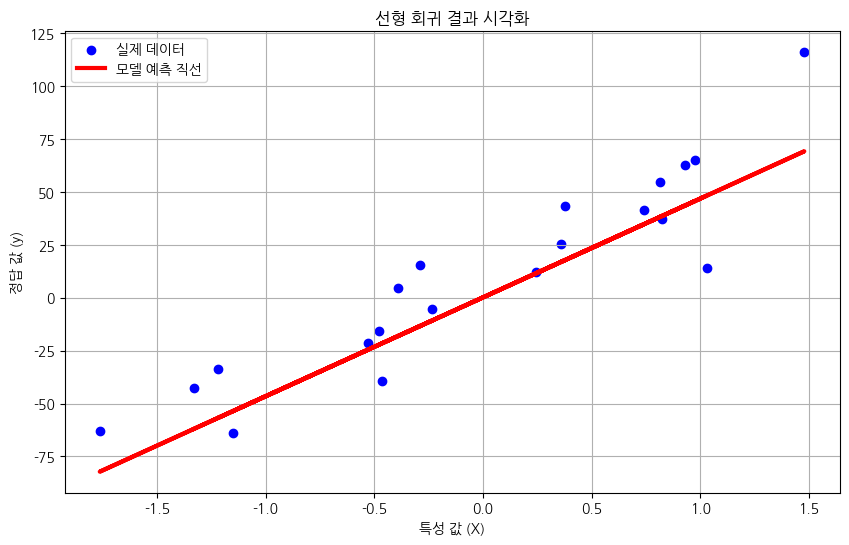

모델의 결정계수(R^2): 0.8019


In [1]:
# 선형 회귀 모델 구현
# 필요한 라이브러리를 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# matplotlib에서 한글을 사용하기 위한 폰트 설정
# 시스템에 'NanumGothic' 폰트가 설치되어 있어야 합니다.
# 만약 폰트가 없다면, 터미널에서 'sudo apt-get install fonts-nanum' (우분투)
# 또는 'brew install font-nanum' (맥) 등으로 설치가 필요할 수 있습니다.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 1. 예제용 가상의 데이터셋을 생성합니다.
# `make_regression`은 회귀 모델 테스트를 위한 가상의 데이터셋을 만들어주는 함수입니다.
# make_classification과 유사하지만, 정답이 연속적인 숫자라는 점이 다릅니다.
X, y = make_regression(
    n_samples=100,           # 샘플(데이터)의 개수
    n_features=1,            # 특성(컬럼)의 개수 (단순화를 위해 1개만 사용)
    noise=20,                # 데이터에 추가할 무작위 노이즈의 정도
    random_state=42
)

# 2. 훈련 세트와 테스트 세트로 데이터를 나눕니다.
# 훈련에 80%, 평가에 20%를 사용합니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("데이터셋 준비 완료.")
print("-" * 30)

# 3. 선형 회귀 모델을 생성하고 훈련합니다.
# LinearRegression 모델 객체를 만듭니다.
model = LinearRegression()
# 훈련 데이터(X_train, y_train)를 사용해 모델을 학습시킵니다.
model.fit(X_train, y_train)

print("선형 회귀 모델 훈련 완료.")
print(f"기울기(가중치, w): {model.coef_[0]:.2f}")
print(f"절편(편향, b): {model.intercept_:.2f}")
print("-" * 30)

# 4. 훈련된 모델을 사용해 테스트 데이터에 대한 예측을 수행합니다.
y_pred = model.predict(X_test)

# 5. 결과를 시각화합니다.
# 그래프 설정을 위한 matplotlib를 사용합니다.
plt.figure(figsize=(10, 6))
plt.title("선형 회귀 결과 시각화")

# 실제 테스트 데이터를 산점도로 그립니다.
plt.scatter(X_test, y_test, color='blue', label='실제 데이터')
# 모델이 예측한 직선을 그립니다.
plt.plot(X_test, y_pred, color='red', linewidth=3, label='모델 예측 직선')

plt.xlabel("특성 값 (X)")
plt.ylabel("정답 값 (y)")
plt.legend()
plt.grid(True)
plt.show()

# 6. 모델의 성능을 평가합니다.
# score() 함수는 R^2(결정계수)를 반환합니다.
print(f"모델의 결정계수(R^2): {model.score(X_test, y_test):.4f}")
